In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns

import math
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, normaltest, pearsonr
from numpy.random import seed, rand, normal, exponential, binomial, poisson


In [2]:
filmes = pd.read_csv('output_data_prep_final2.csv', sep=';')

In [6]:
filmes_semtop10 = pd.read_csv('output_data_prep_final_semtop10.csv', sep=';')

In [3]:
filmes

title_name   title_id  runtime  \
0                             avengers endgame  tt4154796      181   
1                                       avatar  tt0499549      162   
2     star wars episode vii  the force awakens  tt2488496      138   
3                        avengers infinity war  tt4154756      149   
4                               jurassic world  tt0369610      124   
...                                        ...        ...      ...   
2663                     christmas at maxwells  tt0420550       94   
2664                      fighting tommy riley  tt0366444      109   
2665                              down terrace  tt1489167       89   
2666                       the janky promoters  tt1210071       85   
2667                              side effects  tt0438427       90   

      release_day  release_month  release_year  worldwide_gross  \
0              24              4          2019       2797800564   
1              16             12          2009       2790439000   
2              16             12          2015       2068223624   
3              25              4          2018       2048359754   
4              10              6          2015       1670400637   
...           ...            ...           ...              ...   
2663            1             12          2006            12781   
2664            6              5          2005            10514   
2665           15             10          2010             9812   
2666           16             10          2009             9069   
2667            9              9          2005             2216   

      domestic_gross  foreign_gross  opening_gross  ...  language_french  \
0          858373000     1939427564      357115007  ...            False   
1          760507625     2029931375       77025481  ...            False   
2          936662225     1131561399      247966675  ...            False   
3          678815482     1369544272      257698183  ...            False   
4          652270625     1018130012      208806270  ...            False   
...              ...            ...            ...  ...              ...   
2663           12781              0           8375  ...            False   
2664           10514              0           5199  ...            False   
2665            9812              0           3088  ...            False   
2666            9069              0           5702  ...            False   
2667            2216              0           2216  ...            False   

      language_other  weekday_friday  weekday_wednesday  weekday_thursday  \
0               True           False               True             False   
1              False           False               True             False   
2              False           False               True             False   
3              False           False               True             False   
4              False           False               True             False   
...              ...             ...                ...               ...   
2663           False            True              False             False   
2664           False            True              False             False   
2665           False            True              False             False   
2666           False            True              False             False   
2667           False            True              False             False   

      weekday_other        roi  ticket_average_price_by_year  \
0             False   6.858990                          9.11   
1             False  10.774004                          7.50   
2             False   7.441729                          8.43   
3             False   5.482151                          9.11   
4             False  10.136004                          8.43   
...             ...        ...                           ...   
2663          False  -0.995740                          6.55   
2664          False  -0.964953          

In [8]:
filmes_semtop10

title_name   title_id  runtime  \
0                                   black panther  tt1825683      134   
1     harry potter and the deathly hallows part 2  tt1201607      130   
2           star wars episode viii  the last jedi  tt2527336      152   
3                   jurassic world fallen kingdom  tt4881806      128   
4                                          frozen  tt2294629      102   
...                                           ...        ...      ...   
2665                        christmas at maxwells  tt0420550       94   
2666                         fighting tommy riley  tt0366444      109   
2667                                 down terrace  tt1489167       89   
2668                          the janky promoters  tt1210071       85   
2669                                 side effects  tt0438427       90   

      release_day  release_month  release_year  worldwide_gross  \
0              13              2          2018       1346913161   
1              13              7          2011       1341932398   
2              13             12          2017       1332539889   
3               6              6          2018       1308467944   
4              22             11          2013       1280802282   
...           ...            ...           ...              ...   
2665            1             12          2006            12781   
2666            6              5          2005            10514   
2667           15             10          2010             9812   
2668           16             10          2009             9069   
2669            9              9          2005             2216   

      domestic_gross  foreign_gross  opening_gross  ...  language_french  \
0          700059566      646853595      202003951  ...            False   
1          381409310      960523087      169189427  ...            False   
2          620181382      712358507      220009584  ...            False   
3          417719760      890748184      148024610  ...            False   
4          400738009      880064273         243390  ...            False   
...              ...            ...            ...  ...              ...   
2665           12781              0           8375  ...            False   
2666           10514              0           5199  ...            False   
2667            9812              0           3088  ...            False   
2668            9069              0           5702  ...            False   
2669            2216              0           2216  ...            False   

      language_german  language_italian  language_russian  language_other  \
0               False             False             False            True   
1               False             False             False           False   
2               False             False             False           False   
3               False             False              True           False   
4               False             False             False            True   
...               ...               ...               ...             ...   
2665            False             False             False           False   
2666            False             False             False           False   
2667            False             False             False           False   
2668            False             False             False           False   
2669            False             False             False           False   

      age_rating  weekday_friday  weekday_wednesday  weekday_thursday  \
0              3           False              False             False   
1              3           False               True             False   
2              3           False               True             False   
3              3           False               True             False   
4              2            True              False             False   
...          ...             ...                ...               ...   
2665    

In [9]:
filmes_eda = filmes.drop(['title_name', 'title_id', 'release_day', 'release_year', 'opening_gross'], axis='columns').copy()

In [10]:
pp.ProfileReport(filmes_eda)

In [13]:
filmes_eda_semtop10 = filmes_semtop10.drop(['title_name', 'title_id', 'release_day', 'release_year', 'opening_gross'], axis='columns').copy()
pp.ProfileReport(filmes_eda_semtop10)

<AxesSubplot:>

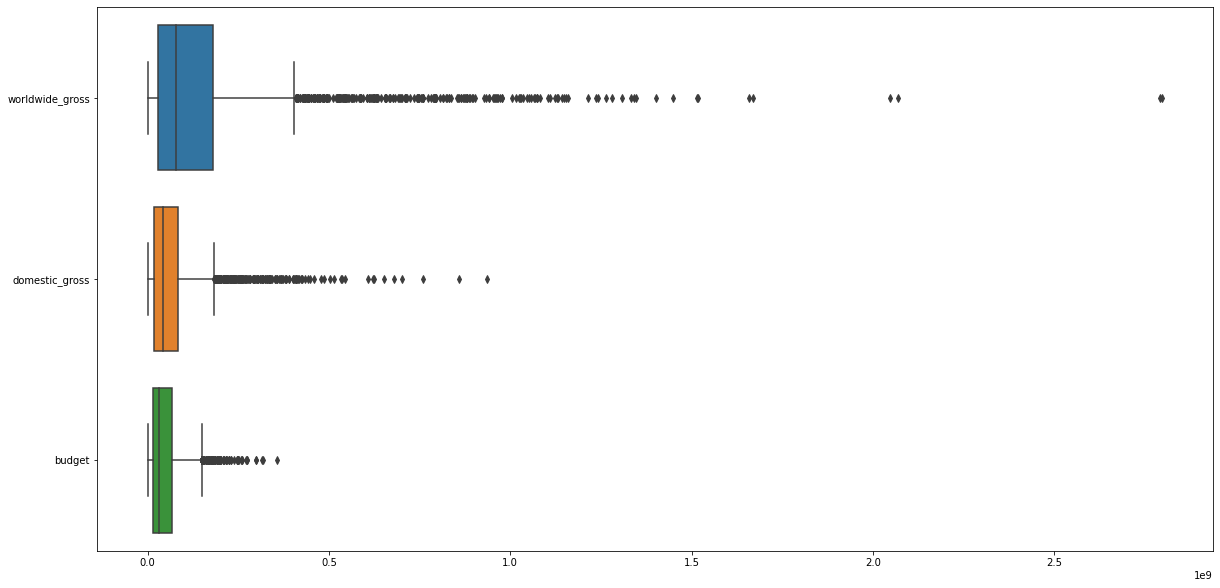

In [6]:
plt.figure(figsize=(20,10))
#sns.boxplot(data=filmes[['worldwide_gross', 'foreign_gross', 'domestic_gross', 'opening_gross', 'budget']],  orient="h")
sns.boxplot(data=filmes[['worldwide_gross', 'domestic_gross', 'budget']],  orient="h")

<AxesSubplot:>

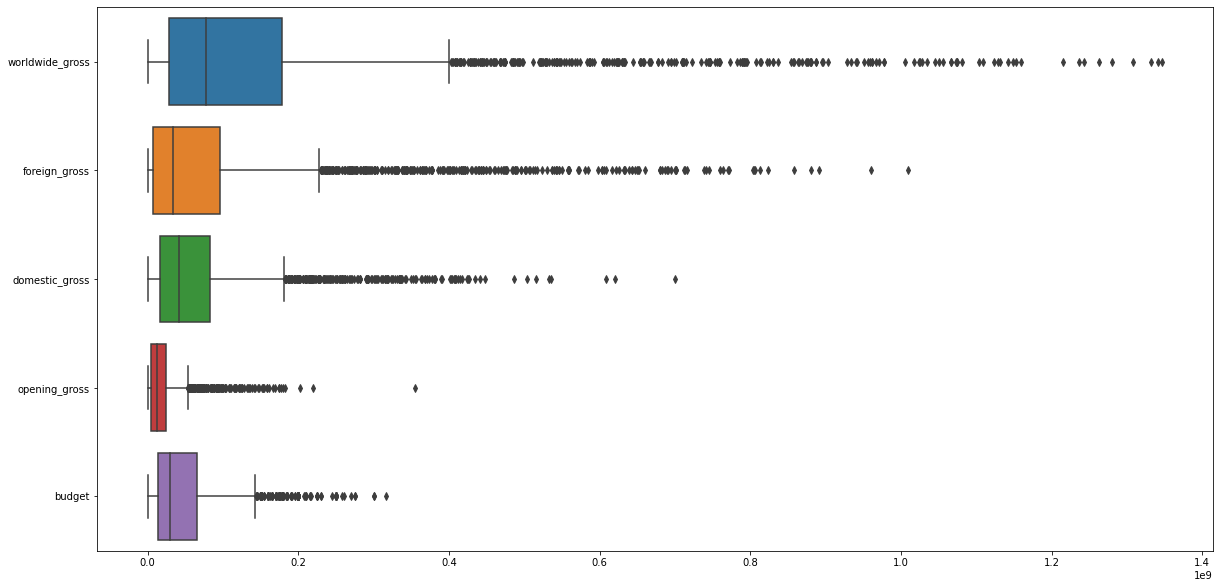

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=filmes_semtop10[['worldwide_gross', 'foreign_gross', 'domestic_gross', 'opening_gross', 'budget']],  orient="h")

In [37]:
filmes.columns

Index(['title_name', 'title_id', 'runtime', 'release_day', 'release_month',
       'release_year', 'worldwide_gross', 'domestic_gross', 'foreign_gross',
       'opening_gross', 'budget', 'genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_family', 'genre_fantasy', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_animation', 'genre_biography',
       'genre_other', 'language_english', 'language_spanish',
       'language_french', 'language_german', 'language_italian',
       'language_russian', 'language_other', 'age_rating', 'weekday_friday',
       'weekday_wednesday', 'weekday_thursday', 'weekday_other'],
      dtype='object')

In [39]:
filmes[['genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_family', 'genre_fantasy', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_animation', 'genre_biography',
       'genre_other']].sum()

genre_drama        1267
genre_comedy       1105
genre_thriller      822
genre_action        787
genre_adventure     665
genre_romance       580
genre_crime         462
genre_family        418
genre_fantasy       433
genre_scifi         401
genre_mystery       338
genre_horror        308
genre_animation     205
genre_biography     167
genre_other         488
dtype: int64

In [40]:
filmes[['language_english', 'language_spanish',
       'language_french', 'language_german', 'language_italian',
       'language_russian', 'language_other']].sum()

language_english    2659
language_spanish     348
language_french      285
language_german      171
language_italian     133
language_russian     142
language_other       624
dtype: int64

In [67]:
filmes['release_year'].to_frame('release_year').groupby('release_year').size().sort_values(ascending=False)

release_year
2010    171
2011    165
2000    157
2002    152
2006    151
2005    146
2009    146
2004    145
2001    145
2003    143
2008    137
2013    124
2015    124
2014    121
2012    118
2007    117
2016    116
2017    109
2018    106
2019     87
dtype: int64

In [68]:
filmes['release_month'].to_frame('release_month').groupby('release_month').size().sort_values(ascending=False)

release_month
10    293
9     265
12    260
8     235
3     232
4     219
6     215
11    214
2     201
7     197
5     184
1     165
dtype: int64

In [69]:
filmes['age_rating'].to_frame('age_rating').groupby('age_rating').size().sort_values(ascending=False)

age_rating
3    1133
4    1039
2     447
1      61
dtype: int64

In [70]:
filmes[['weekday_friday','weekday_wednesday', 'weekday_thursday', 'weekday_other']].sum().sort_values(ascending=False)

weekday_friday       1290
weekday_wednesday     706
weekday_thursday      609
weekday_other          75
dtype: int64

In [74]:
filmes[filmes['weekday_friday']==True]['runtime'].mean()

106.01317829457365

In [75]:
filmes[filmes['weekday_thursday']==True]['runtime'].mean()

107.48440065681444

In [76]:
filmes[filmes['weekday_wednesday']==True]['runtime'].mean()

113.35835694050992

In [77]:
filmes[filmes['weekday_other']==True]['runtime'].mean()

115.77333333333333

<AxesSubplot:>

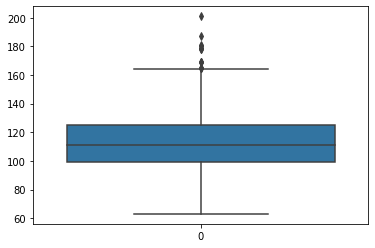

In [89]:
sns.boxplot(data=filmes[filmes['weekday_wednesday']==True]['runtime'])